In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv(r'C:\Users\Manikanteswar Reddy\Downloads\Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df=df.iloc[:,2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
89,35,50000,0
211,52,150000,1
34,27,90000,0
38,26,72000,0
279,50,36000,1


In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## TRAIN TEST SPLIT

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,0:2],
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

## STANDARDIZATION

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train) #calculate the mean values
#displaying the values
scaler.mean_ # It will  give two mean values of age and Estimated salary

array([3.78642857e+01, 6.98071429e+04])

### Transforming the values

In [11]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#The output will be a numpy array.We need to convert it into dataframe

## Transforming to DataFrame

In [12]:
X_train_df=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Checking the mean

In [13]:
np.round(X_train_df.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


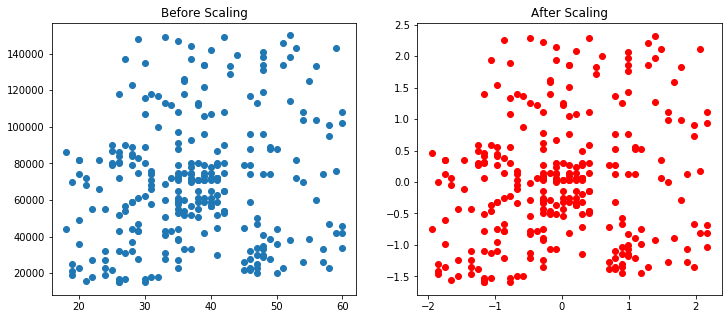

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5)) # To create multiple subplots
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_df['Age'], X_train_df['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

## OBSERVATION:
WE CAN SEE THAT THERE IS NO CHANGE IN THE PLOT BUT THERE IS A CHANGE IN THE SCALE IN BOTH AXIS.

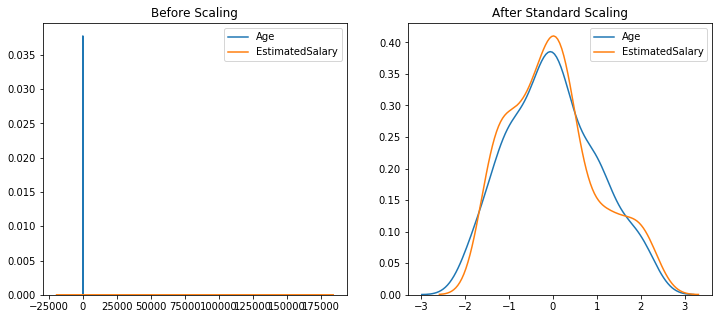

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_df['Age'], ax=ax2)
sns.kdeplot(X_train_df['EstimatedSalary'], ax=ax2)
plt.show()

Its because of scaling we can find the relationship between Age and Estimated salary

# COMPARISON OF DISTUBUTIONS

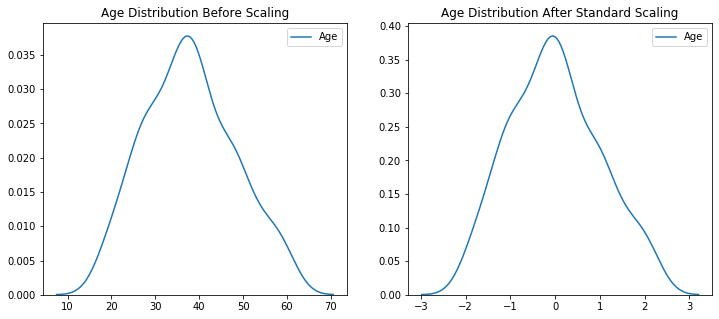

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_df['Age'], ax=ax2)
plt.show()

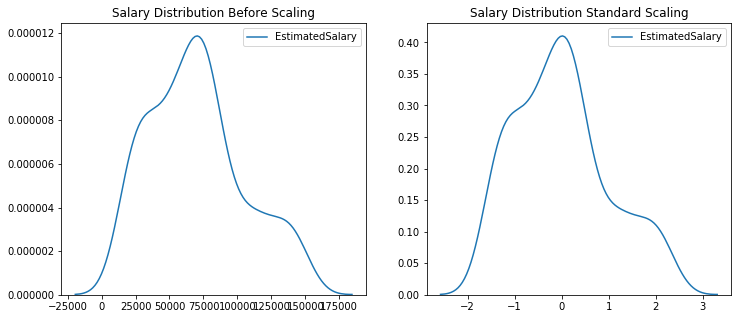

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_df['EstimatedSalary'], ax=ax2)
plt.show()

# WHY SCALING IS IMPORTANT

In [18]:
from sklearn.linear_model import LogisticRegression

## FITTING THE MODELTO RAW DATA

In [19]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## FITTING THE DATA TO SCALED DATA

In [20]:
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_df,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_df)

In [22]:
from sklearn.metrics import accuracy_score #CALCULATING THE ACCURACY
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


# USING DESCION TREE

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [25]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_df,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_df)
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


Descision tree dont have any impact on scaling.

## EFFECT OF OUTLERS

In [27]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [28]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


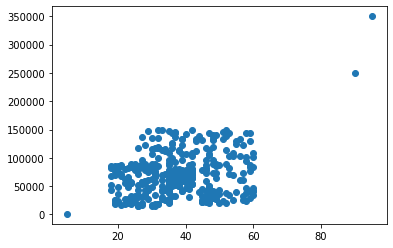

In [29]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_test,y_train=train_test_split(df.iloc[:,:2],df['Purchased'],test_size=0.3,random_state=0)


X_train.shape,X_test.shape

((282, 2), (121, 2))

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [40]:
X_train_scale=pd.DataFrame(X_train_scale, columns=X_train.columns)
X_test_scale=pd.DataFrame(X_test_scale,columns=X_train.columns)

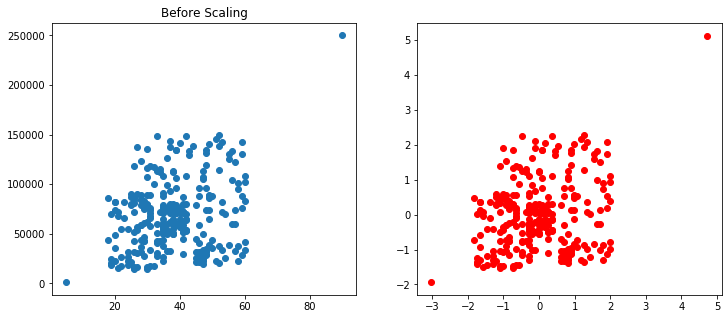

In [48]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scale['Age'],X_train_scale['EstimatedSalary'],color='red')